In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#loading training data
training_data_obj = pd.read_csv('mnist_train.csv',header=None)
traindata = np.array(training_data_obj)


In [3]:
#input training features
X_train=traindata[:,1:].T
#print(X_train,X_train.shape)
X_train=X_train/255


In [4]:
#output training values
Y_train = traindata[:,0]
Y_train = Y_train.reshape(1,Y_train.shape[0])
#print(Y_train)

#one-hot encoding output values
Y_prob=np.zeros((10,60000))
for i in range(0,60000):
    a=Y_train[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_train_real=Y_train
#print(Y_prob)    
Y_train=Y_prob

In [5]:
def relu(Z):
    
    A = np.maximum(0,Z)
    
    return A

In [6]:
def relu_backward(dA):
    
    # dJ/dZ = dJ/dA * dA/dZ and dA/dZ =1 when relu(z)=1 and 0 otherwise
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ=np.ones((dA.shape))
    dZ[dA <= 0] = 0
    
    return dZ

In [7]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

Epoch 0 cost:  76.72812156936392 	 Accuracy : 0.07541666666666667
Epoch 10 cost:  2.6104400305029705 	 Accuracy : 0.3755500000000001
Epoch 20 cost:  2.0186757994126205 	 Accuracy : 0.4358833333333334
Epoch 30 cost:  1.7680776795470594 	 Accuracy : 0.4848500000000001
Epoch 40 cost:  1.5988022132432043 	 Accuracy : 0.5282000000000001
Epoch 50 cost:  1.4651192991731334 	 Accuracy : 0.5675333333333334
Epoch 60 cost:  1.4251124629340273 	 Accuracy : 0.5802666666666668
Epoch 70 cost:  1.3384321086068625 	 Accuracy : 0.6057666666666668
Epoch 80 cost:  1.2597104334947289 	 Accuracy : 0.6324833333333335
Epoch 90 cost:  1.194219106904207 	 Accuracy : 0.6576500000000002
Epoch 100 cost:  1.1385476041680656 	 Accuracy : 0.6758000000000002
Epoch 110 cost:  1.0876358853534291 	 Accuracy : 0.6921666666666669
Epoch 120 cost:  1.0413567961196344 	 Accuracy : 0.7067333333333337
Epoch 130 cost:  0.9974352048762546 	 Accuracy : 0.7194333333333336
Epoch 140 cost:  0.9633427805523808 	 Accuracy : 0.728866666

Epoch 1210 cost:  0.3037690295276118 	 Accuracy : 0.909116666666667
Epoch 1220 cost:  0.30147179367113486 	 Accuracy : 0.9095000000000002
Epoch 1230 cost:  0.29996128443736036 	 Accuracy : 0.9097833333333335
Epoch 1240 cost:  0.5728476119875481 	 Accuracy : 0.8487000000000002
Epoch 1250 cost:  0.31342913544492773 	 Accuracy : 0.9082000000000001
Epoch 1260 cost:  0.3024994117965313 	 Accuracy : 0.9102000000000003
Epoch 1270 cost:  0.2983030665681293 	 Accuracy : 0.9109000000000003
Epoch 1280 cost:  0.2956724673009408 	 Accuracy : 0.9111166666666669
Epoch 1290 cost:  0.2936732062426073 	 Accuracy : 0.9117333333333336
Epoch 1300 cost:  0.2919553730675757 	 Accuracy : 0.9121833333333336
Epoch 1310 cost:  0.29053247975727325 	 Accuracy : 0.9124000000000002
Epoch 1320 cost:  0.7276919728553559 	 Accuracy : 0.8158333333333336
Epoch 1330 cost:  0.3200014905031592 	 Accuracy : 0.9087000000000001
Epoch 1340 cost:  0.3022875558027142 	 Accuracy : 0.9108833333333336
Epoch 1350 cost:  0.29466158680

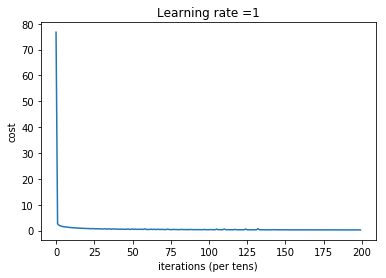

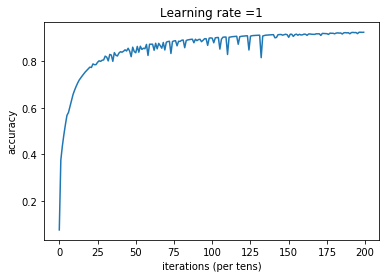

Final cost: 0.2624911611310409
Total Accuracy : 0.9250166666666669


In [8]:
n_x = X_train.shape[0]  #input features =28*28
n_h = 64                #hidden layer units, change it to get better results
learning_rate = 1       #hyper_parameter: change it to get better results
digits=10
m=X_train.shape[1]

#list to store all the costs and accuracies
costs=[]                
accuracies=[]

#initialize weights and biases
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000): #number of iterations
    
    #calculating parameters
    Z1 = np.matmul(W1,X) + b1
    A1 = relu(Z1)
    
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    #calculating cost
    cost = compute_multiclass_loss(Y, A2)
    
    #calculating derivatives
    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_backward(Z1)
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    #updating weights and biases
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 10 == 0):  # printing cost,accuracy after every 10th iteration
        
        predictions = np.argmax(A2, axis=0)
        labels = np.argmax(Y_train, axis=0)
        acc = np.sum((predictions == labels)/m)
        print("Epoch", i, "cost: ", cost,'\t Accuracy :',acc)
        costs.append(cost)
        accuracies.append(acc)
        
#plotting cost and accuracy
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

plt.plot(np.squeeze(accuracies))
plt.ylabel('accuracy')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Final cost:", cost)
print('Total Accuracy :',np.sum((predictions == labels)/m))


In [9]:
#Repeting the last iteration to see the final cost and accuracy
#using the latest(best) W1, b1 values
Z1 = np.matmul(W1, X_train) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_train, axis=0)

#analysis report for trained model
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print("Final cost:", cost,'\tTotal Accuracy :',np.sum((predictions == labels)/m))

[[5724    0   40   16   18   60   50   15   21   21]
 [   1 6577   38   17   15    8    5   26   42   17]
 [  19   27 5175   69   24   20   34   33   33    6]
 [   8   27  154 5591    1  266    1   39  133  109]
 [  11   10   91   12 5576   22   27   58   16  420]
 [  18    8    7   77    5 4693   47    3   86   45]
 [  51    5  101   21   43  117 5693    4   66    3]
 [  22   16  141  103   23   38    5 5988   30  336]
 [  59   56  203  197   29  160   50   29 5337   86]
 [  10   16    8   28  108   37    6   70   87 4906]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5965
           1       0.98      0.97      0.98      6746
           2       0.87      0.95      0.91      5440
           3       0.91      0.88      0.90      6329
           4       0.95      0.89      0.92      6243
           5       0.87      0.94      0.90      4989
           6       0.96      0.93      0.95      6104
           7       0.96      0.89   

In [10]:
#loading test data
testing_data_obj = pd.read_csv('mnist_test.csv',header=None)
testdata = np.array(testing_data_obj)

#test data input features
X_test=testdata[:,1:].T
#print(X_test,X_test.shape)
X_test=X_test/255

#test data output values
Y_test = testdata[:,0]
Y_test = Y_test.reshape(1,Y_test.shape[0])
#print(Y_test,Y_test[0,0],Y_test.shape,testdata.shape)

#one-hot encoding output values
m=Y_test.shape[1]
Y_prob=np.zeros((10,m))
for i in range(0,m):
    a=Y_test[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_test_real=Y_test
#print(Y_prob,Y_prob.shape)    
Y_test=Y_prob

In [11]:
#using the latest(best) W1,W2, b1,b2 values to calculate the output of the test cases

Z1 = np.matmul(W1, X_test) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print('Total Accuracy :',np.sum((predictions == labels)/m))

[[ 948    0    9    4    1    9   15    2    4    9]
 [   1 1108   11    1    0    1    3    9    0    6]
 [   3    4  879    9    7    0    4   17   12    0]
 [   1    4   32  932    1   45    0    4   23   17]
 [   0    1   14    1  931   10    9    9   10   87]
 [   7    2    3   13    0  763   12    1   14    7]
 [  11    3   16    5   12   22  904    0   13    2]
 [   5    0   23   13    5    8    3  963   13   46]
 [   4   12   44   31    4   29    8    5  872   15]
 [   0    1    1    1   21    5    0   18   13  820]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1001
           1       0.98      0.97      0.97      1140
           2       0.85      0.94      0.89       935
           3       0.92      0.88      0.90      1059
           4       0.95      0.87      0.91      1072
           5       0.86      0.93      0.89       822
           6       0.94      0.91      0.93       988
           7       0.94      0.89   